In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('DailyEnergyDemandDataCleaned.csv')
df

,Date,Demand
0,2015-07-01,20243
1,2015-07-02,19275
2,2015-07-03,17682
3,2015-07-04,16523
4,2015-07-05,17620
...,...,...
2435,2022-03-01,18069
2436,2022-03-02,16941
2437,2022-03-03,17313
2438,2022-03-04,17953


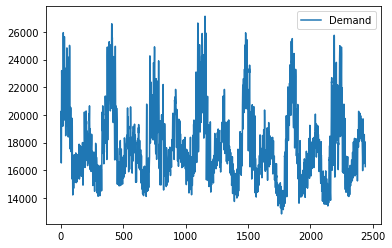

In [4]:
df.plot()

In [5]:
df['year'] = pd.DatetimeIndex(df['Date']).year

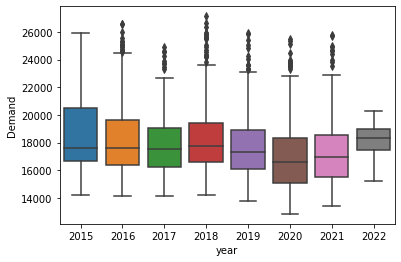

In [6]:
sns.boxplot(x='year', y='Demand', data=df)

In [7]:
df['top_quantile'] = 0
df['bottom_quantile'] = 0

In [8]:
for year in df['year'].unique():
  top_quantile = df[df['year'] == year].quantile(0.95)[0]
  bottom_quantile = df[df['year'] == year].quantile(0.05)[0]
  df['top_quantile'][df['year'] == year] = top_quantile
  df['bottom_quantile'][df['year'] == year] = bottom_quantile

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist

In [9]:
df

,Date,Demand,year,top_quantile,bottom_quantile
0,2015-07-01,20243,2015,24561.15,15359.25
1,2015-07-02,19275,2015,24561.15,15359.25
2,2015-07-03,17682,2015,24561.15,15359.25
3,2015-07-04,16523,2015,24561.15,15359.25
4,2015-07-05,17620,2015,24561.15,15359.25
...,...,...,...,...,...
2435,2022-03-01,18069,2022,19710.75,16293.30
2436,2022-03-02,16941,2022,19710.75,16293.30
2437,2022-03-03,17313,2022,19710.75,16293.30
2438,2022-03-04,17953,2022,19710.75,16293.30


In [18]:
top_anomaly_dates = df[df['Demand'] > df['top_quantile']]['Date']
bottom_anomaly_dates =  df[df['Demand'] < df['bottom_quantile']]['Date']

In [19]:
top_anomaly_dates

19      2015-07-20
27      2015-07-28
28      2015-07-29
29      2015-07-30
47      2015-08-17
           ...    
2249    2021-08-27
2386    2022-01-11
2396    2022-01-21
2402    2022-01-27
2421    2022-02-15
Name: Date, Length: 128, dtype: object

In [20]:
bottom_anomaly_dates

95      2015-10-04
101     2015-10-10
102     2015-10-11
108     2015-10-17
116     2015-10-25
           ...    
2314    2021-10-31
2376    2022-01-01
2377    2022-01-02
2418    2022-02-12
2439    2022-03-05
Name: Date, Length: 128, dtype: object

In [21]:
bottom_anomaly_dates.to_csv('bottom_anomaly_dates.csv', index = False)
top_anomaly_dates.to_csv('top_anomaly_dates.csv', index = False)